<font face="微软雅黑" size=5 color=#A52A2A > 引入L2正则化

In [175]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rcParams 

In [176]:
config = {
    "mathtext.fontset":'stix',
    "font.family":'serif',
    "font.serif": ['SimHei'],
    "font.size": 10,
    'axes.unicode_minus': False 
}
rcParams.update(config)

<font face="微软雅黑" size=3> 读取数据

In [177]:
path ='D:\\qq.file\\regress_data1.csv'
import pandas as pd
data = pd.read_csv(path)
data_tr = data.iloc[:-30]
data_t = data.tail(30)

In [178]:
rows = data.shape[0]
cols = data.shape[1]
X_data = data.iloc[:rows-30,:cols-1]
y_data = data.iloc[:rows-30,cols-1:]
cols_text = data_t.shape[1]
X_data_test = data_t.iloc[:,:cols_text-1]
y_data_test = data_t.iloc[:,cols_text-1:]

<font face="微软雅黑" size=3> 利用散点图可视化数据

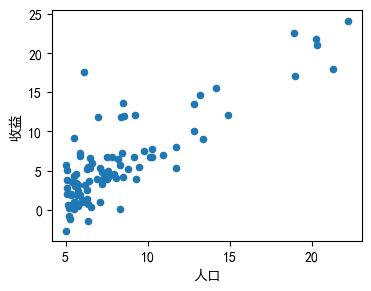

In [179]:
data.plot(kind='scatter', x='人口', y='收益', figsize=(4,3))
plt.xlabel('人口')
plt.ylabel('收益', rotation=90)
plt.show()

In [180]:
X_data.insert(0, 'Ones', 1)

In [181]:
X=X_data.values
Y=y_data.values
Y_test=y_data_test.values
W=np.array([[0.0],[0.0]])

In [182]:
#def computeCost(X, Y, W):
    #Y_hat = np.dot(X,W)
    #loss =np.sum((Y_hat - Y)** 2)/(2*X.shape[0])
    #return loss

In [183]:
def computeCost(X, Y, W, l2):  
    Y_hat = X @ W  
    one = np.sum((Y_hat - Y)**2)/(2*X.shape[0])  
    two = l2*np.sum(W**2)/(2*X.shape[0])    
    loss = one + two  
    return loss

<font face="微软雅黑" size=3 > 梯度下降函数

<font face="微软雅黑" size=3>正则化系数取0.1

In [184]:
def gradientDescent(X, Y, W, alpha,l2):
    num_train = X.shape[0]     
    Y_hat = np.dot(X,W)        
    dW = X.T@(Y_hat-Y)/ X.shape[0]
    W = W*(1- alpha*l2/X.shape[0]) - alpha*dW
    return W

In [185]:
def linearRegression(X,Y, alpha, iters):
    loss_his = []
    w_his = []
    feature_dim = X.shape[1]
    W=np.zeros((feature_dim,1)) 
    for i in range (iters):
        loss = computeCost(X,Y,W,0.1)
        loss_his.append(loss)
        w_his.append(W.copy())
        W=gradientDescent(X, Y, W, alpha,0.1)
    return loss_his, W ,w_his

In [186]:
def predict(X, W):
    y_pre = np.dot(X,W)
    return y_pre

In [187]:
alpha =0.005
iters = 10000
W_his = []
loss_his, W ,W_his= linearRegression(X,Y, alpha, iters)

In [188]:
W

array([[-3.0239329 ],
       [ 1.15580048]])

In [189]:
W_his

[array([[0.],
        [0.]]),
 array([[0.03365202],
        [0.38145273]]),
 array([[0.05103172],
        [0.5934601 ]]),
 array([[0.05937408],
        [0.71134743]]),
 array([[0.06269781],
        [0.77695483]]),
 array([[0.06323514],
        [0.81352275]]),
 array([[0.062226  ],
        [0.83396032]]),
 array([[0.06035909],
        [0.84543803]]),
 array([[0.05801698],
        [0.85193878]]),
 array([[0.05541215],
        [0.85567492]]),
 array([[0.05266264],
        [0.85787531]]),
 array([[0.04983401],
        [0.85922253]]),
 array([[0.04696266],
        [0.86009574]]),
 array([[0.04406882],
        [0.86070553]]),
 array([[0.04116374],
        [0.86116889]]),
 array([[0.03825364],
        [0.86155078]]),
 array([[0.03534198],
        [0.86188732]]),
 array([[0.03243071],
        [0.86219853]]),
 array([[0.02952087],
        [0.86249557]]),
 array([[0.02661306],
        [0.86278461]]),
 array([[0.02370761],
        [0.86306909]]),
 array([[0.0208047 ],
        [0.86335092]]),
 arr

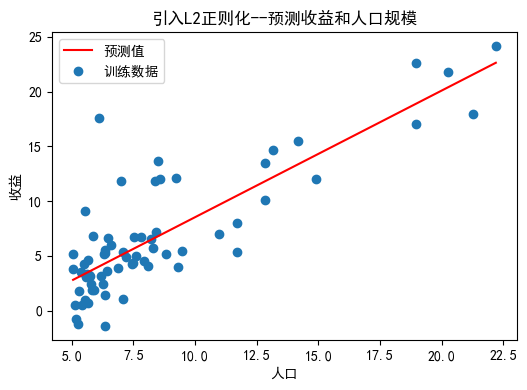

In [190]:
x = np.linspace(X_data['人口'].min(), X_data['人口'].max(), 100)
f = W[0, 0] + (W[1, 0] * x)
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(x, f, 'r', label='预测值')
ax.scatter(X_data['人口'], data_tr['收益'], label='训练数据')
ax.legend(loc=2)
ax.set_xlabel('人口' )
ax.set_ylabel('收益', rotation=90)
ax.set_title('引入L2正则化--预测收益和人口规模')
plt.show()

<font face="微软雅黑" size=5 color=#A52A2A > 利用最小二乘法求解线性回归模型

In [191]:
W = np.linalg.pinv(X.T @ X) @ X.T @ Y

In [192]:
W

array([[-3.04868757],
       [ 1.15819268]])

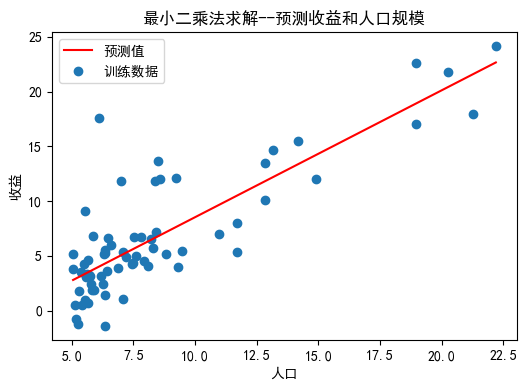

In [193]:
x = np.linspace(X_data['人口'].min(), X_data['人口'].max(), 100)
f = W[0, 0] + (W[1, 0] * x)
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(x, f, 'r', label='预测值')
ax.scatter(X_data['人口'], data_tr['收益'], label='训练数据')
ax.legend(loc=2)
ax.set_xlabel('人口' )
ax.set_ylabel('收益', rotation=90)
ax.set_title('最小二乘法求解--预测收益和人口规模')
plt.show()

<font face="微软雅黑" size=5 color=#A52A2A > 引入数据归一化

In [194]:
from sklearn.preprocessing import MinMaxScaler
cols = data.shape[1]
XX_data = data.iloc[:,:cols-1]
YY_data = data.iloc[:,cols-1:]


In [195]:
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(XX_data)
Y_normalized = scaler.fit_transform(YY_data)

In [196]:
ones = np.ones((X_normalized.shape[0], 1))

In [197]:
X_normalized = np.concatenate((ones,X_normalized),axis=1)

In [198]:
loss_his1, W1 ,W1_his= linearRegression(X_normalized,Y_normalized, alpha, iters)

In [199]:
W1

array([[0.19182453],
       [0.69135759]])

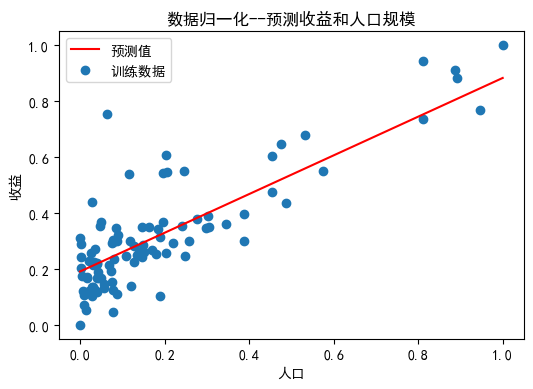

In [200]:
x = np.linspace(0, 1, 100)
f = W1[0, 0] + (W1[1, 0] * x)
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(x, f, 'r', label='预测值')
ax.scatter(X_normalized[:,1], Y_normalized, label='训练数据')
ax.legend(loc=2)
ax.set_xlabel('人口' )
ax.set_ylabel('收益', rotation=90)
ax.set_title('数据归一化--预测收益和人口规模')
plt.show()

<font face="微软雅黑" size=5 color=#A52A2A >画出训练和测试损失函数

In [201]:
X_normalized_text = scaler.fit_transform(X_data_test)
ones1 = np.ones((X_normalized_text.shape[0], 1))
X_test = np.concatenate((ones1,X_normalized_text),axis=1)
Y_test = scaler.fit_transform(Y_test)

In [202]:
loss_his2 = []
for W in W1_his:
    loss = computeCost(X_test, Y_test,W, 0.1)
    loss_his2.append(loss)

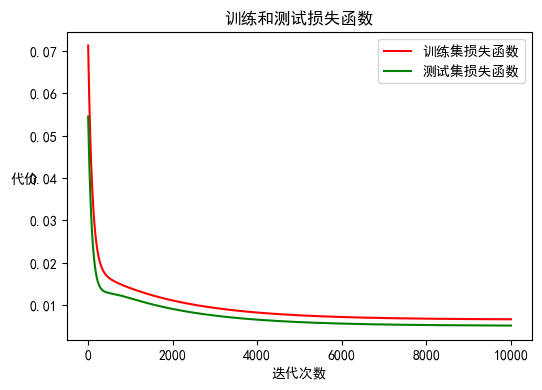

In [203]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(np.arange(iters), loss_his1, 'r',label='训练集损失函数')
ax.plot(np.arange(iters), loss_his2, 'g',label='测试集损失函数')
ax.legend(loc=1)
ax.set_xlabel('迭代次数')
ax.set_ylabel('代价', rotation=0)
ax.set_title('训练和测试损失函数')
plt.show()

<font face="微软雅黑" size=5 color=#A52A2A > 推导引入L2正则项后的梯度公式

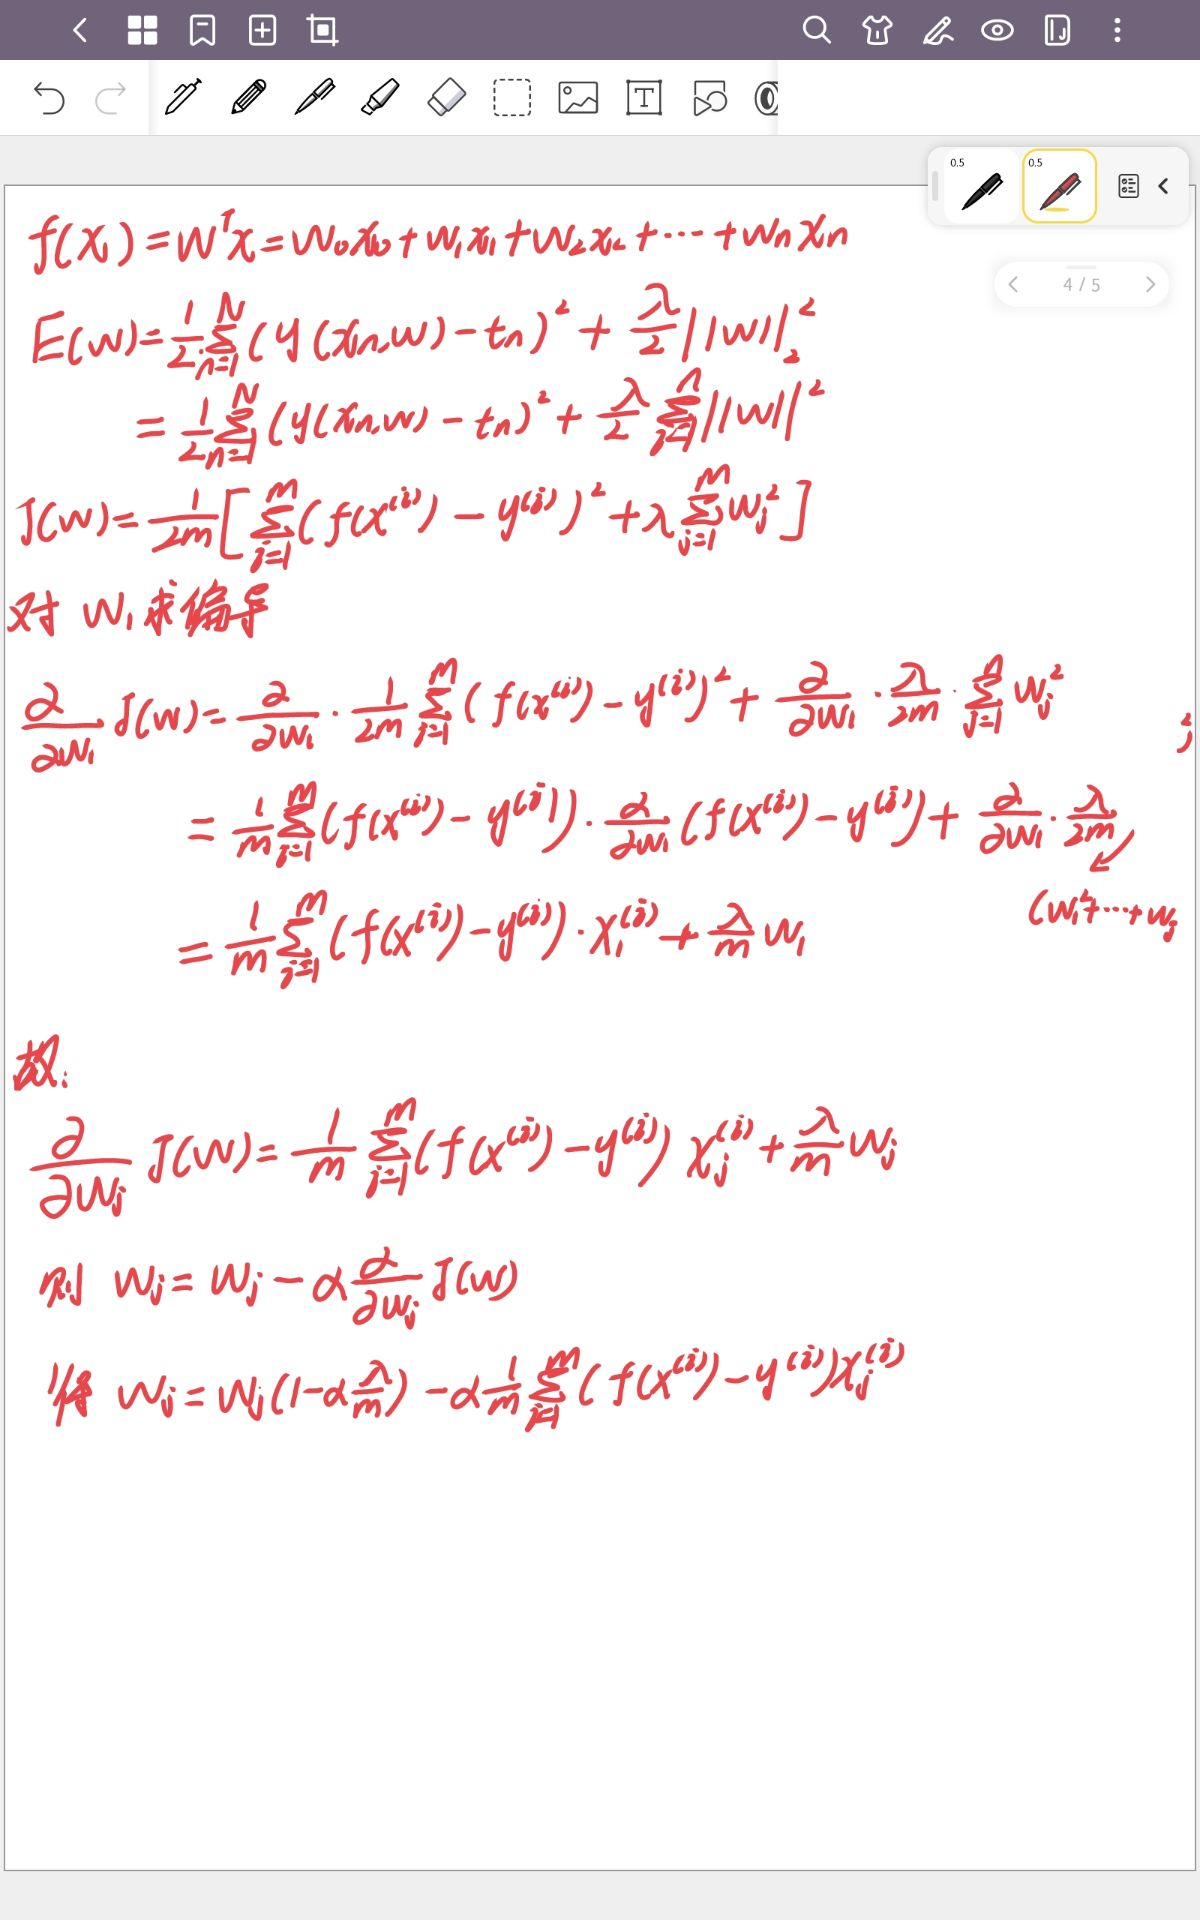